# Import library

In [1]:
import pandas as pd

# Generate datasets

In [2]:
df = pd.read_csv('../data/transaction_send_rates/ReserveSendRates_1minute.csv')
df = df.drop('Time', axis=1)
df.head()

,Number
0,1309
1,1813
2,1310
3,1009
4,1409


In [4]:
df_2mins = df.groupby(df.index // 2).sum()
df_2mins

,Number
0,3122
1,2319
2,2922
3,2825
4,2621
...,...
21595,5449
21596,6858
21597,4841
21598,6147


In [5]:
df_2mins.index = pd.date_range(start='2014/09/01 00:02', end='2014/10/01 00:00', periods=21600) 
df_2mins

,Number
2014-09-01 00:02:00,3122
2014-09-01 00:04:00,2319
2014-09-01 00:06:00,2922
2014-09-01 00:08:00,2825
2014-09-01 00:10:00,2621
...,...
2014-09-30 23:52:00,5449
2014-09-30 23:54:00,6858
2014-09-30 23:56:00,4841
2014-09-30 23:58:00,6147


In [6]:
df_2mins.to_csv('../data/transaction_send_rates/ReserveSendRates_2minutes.csv')

In [7]:
df = pd.read_csv('../data/transaction_send_rates/ReserveSendRates_2minutes.csv', index_col=0)
df.head()

,Number
2014-09-01 00:02:00,3122
2014-09-01 00:04:00,2319
2014-09-01 00:06:00,2922
2014-09-01 00:08:00,2825
2014-09-01 00:10:00,2621


In [8]:
df.shape

(21600, 1)

Text(0.5, 1.0, 'Number of transaction send rates every 1 minute')

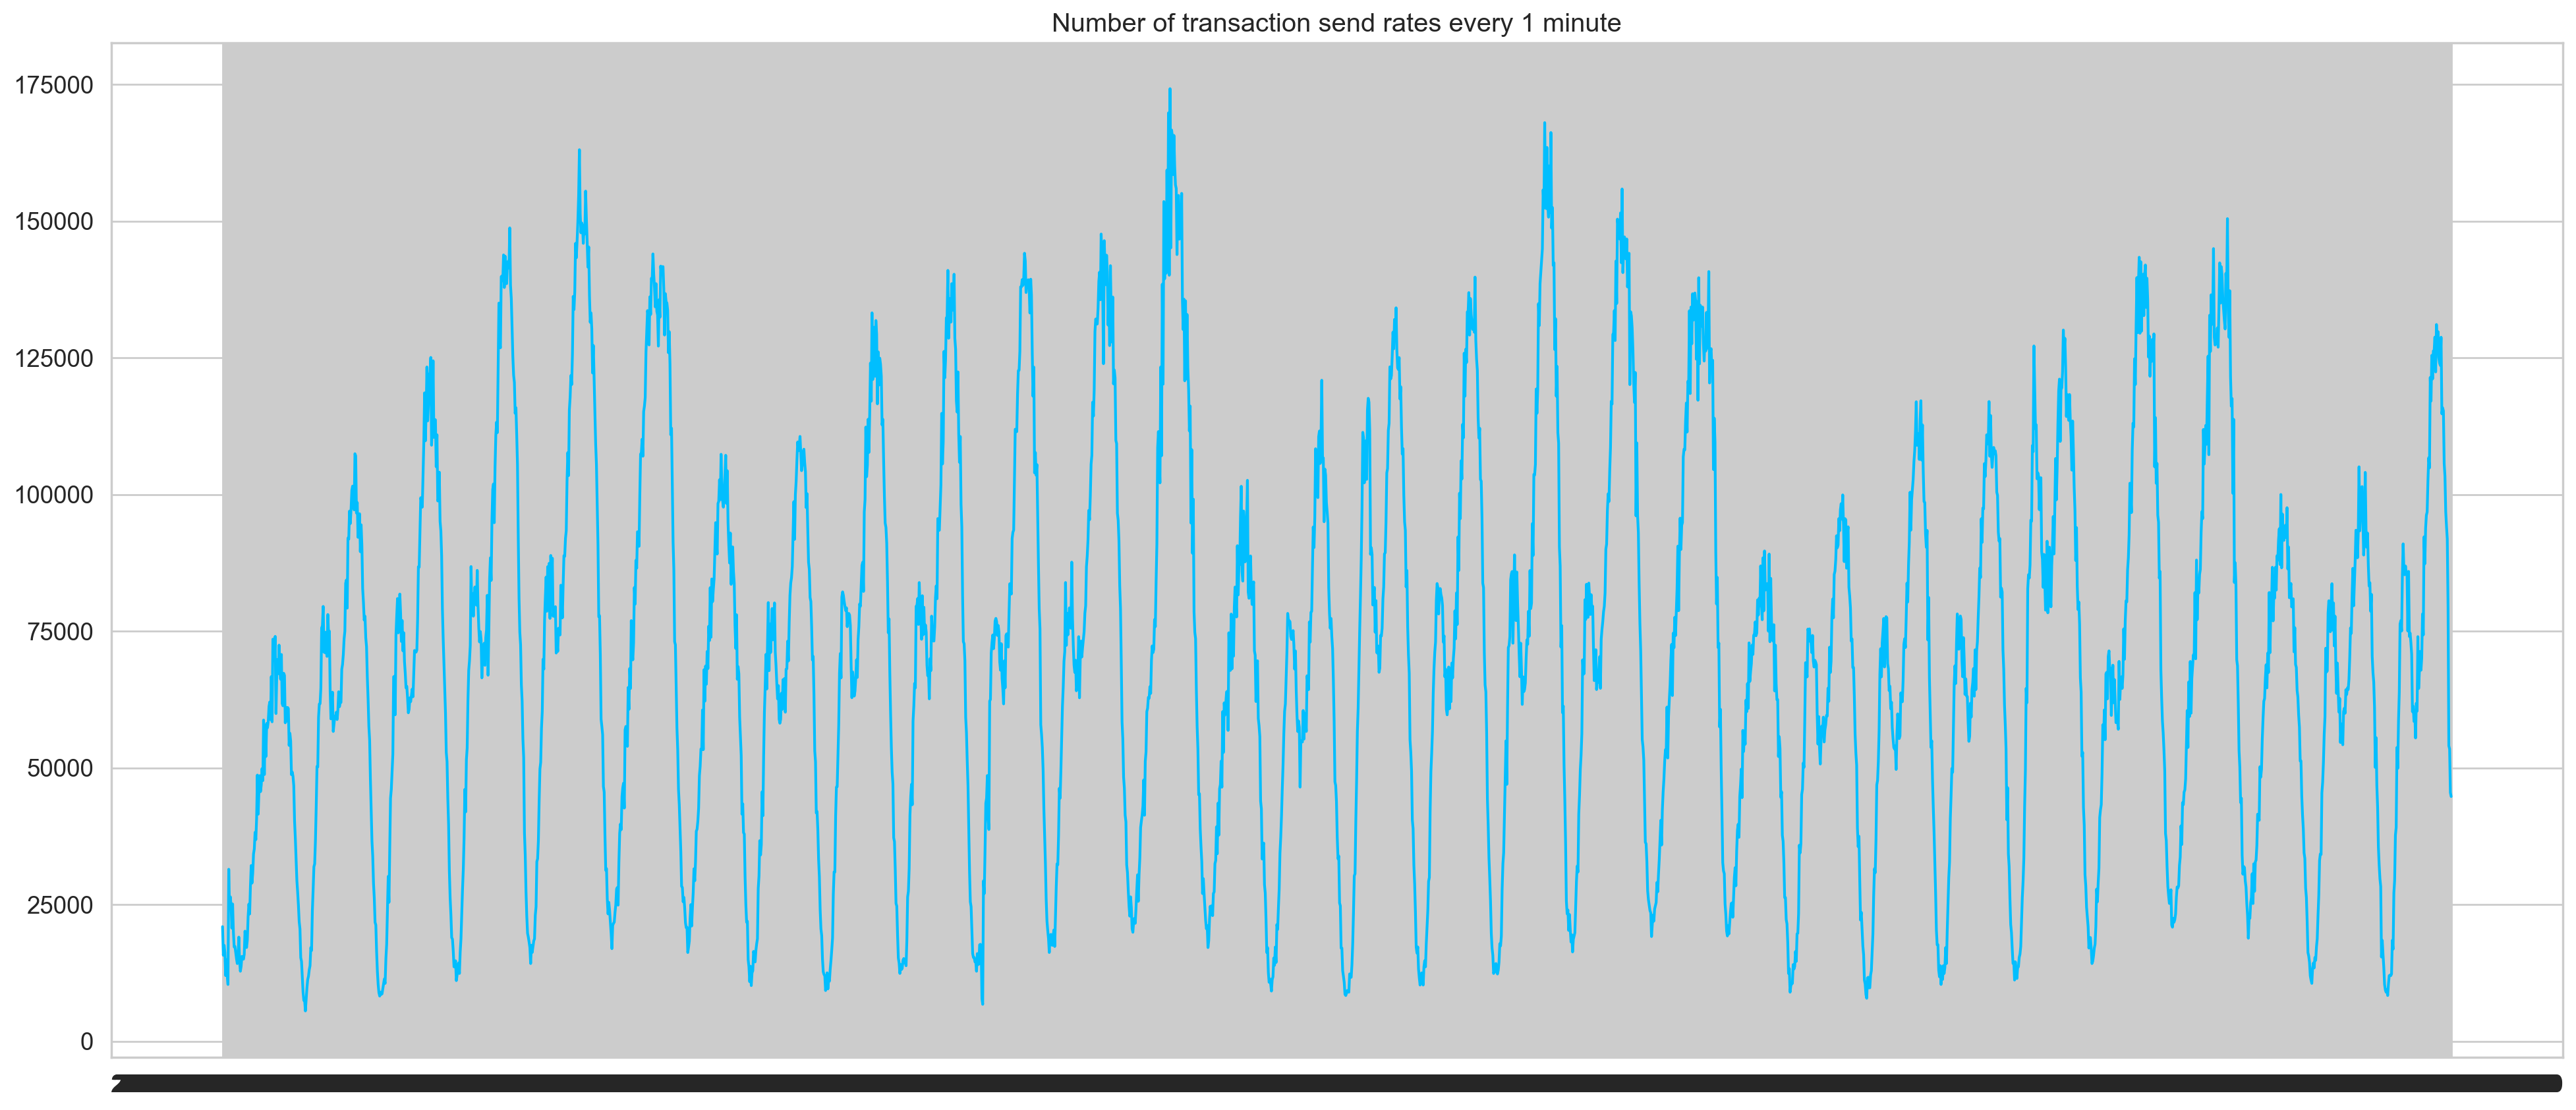

In [24]:
# import seaborn as sns
# from pylab import rcParams
# import matplotlib.pyplot as plt
# from matplotlib import rc

# %matplotlib inline
# %config InlineBackend.figure_format='retina'

# sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

# sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

# rcParams['figure.figsize'] = 24, 10

# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()
# plt.plot(df)
# plt.title('Number of transaction send rates every 5 minutes')

In [9]:
# Save transaction occurrence data as npy file
import numpy as np


Number = df['Number'].values.reshape(21600, 1)
np.save("../data/transaction_send_rates/ReserveSendRates_2minutes.npy", Number)